In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/labeled.csv")

In [3]:
df = df[df['label'].isin(['positive','neutral','negative'])]

In [4]:
counts = df.groupby('speaker')['label'].value_counts()

In [5]:
def sum_values_in_dict(my_dict):
    total_sum = 0
    for value in dict(my_dict).values():
        total_sum += value
    return total_sum



In [6]:
import numpy as np

# Helper function to calculate standard error
def calculate_standard_error(values):
    n = len(values)
    if n > 1:
        return np.std(values, ddof=1) / np.sqrt(n)
    else:
        return 0.0

percent_negative = []

for speaker in set(df['speaker']):
    speaker_df = df[df['speaker'] == speaker]
    num_negative = (speaker_df['label'] == 'negative').sum()
    num_total = len(speaker_df)

    # Calculate sentiment ratio and standard error
    sentiment_ratio = num_negative / num_total
    standard_error = calculate_standard_error(speaker_df['label'] == 'negative')

    # Calculate log and weighted result
    result = sentiment_ratio

    percent_negative.append({
        "speaker": speaker,
        "ratio": result,
        "summed": num_total,
        "standard_error": standard_error
    })


In [7]:
negs = pd.DataFrame(percent_negative).sort_values('ratio', ascending = False)

In [8]:
negs = negs[negs['summed'] >= 25]

In [9]:
presidents_dict = {
    "George Washington": 1,
    "John Adams": 2,
    "Thomas Jefferson": 3,
    "James Madison": 4,
    "James Monroe": 5,
    "John Quincy Adams": 6,
    "Andrew Jackson": 7,
    "Martin Van Buren": 8,
    "William Henry Harrison": 9,
    "John Tyler": 10,
    "James K. Polk": 11,
    "Zachary Taylor": 12,
    "Millard Fillmore": 13,
    "Franklin Pierce": 14,
    "James Buchanan": 15,
    "Abraham Lincoln": 16,
    "Andrew Johnson": 17,
    "Ulysses S. Grant": 18,
    "Rutherford B. Hayes": 19,
    "James A. Garfield": 20,
    "Chester A. Arthur": 21,
    "Grover Cleveland": 22,
    "Benjamin Harrison": 23,
    "Grover Cleveland": 24,
    "William McKinley": 25,
    "Theodore Roosevelt": 26,
    "William Howard Taft": 27,
    "Woodrow Wilson": 28,
    "Warren G. Harding": 29,
    "Calvin Coolidge": 30,
    "Herbert Hoover": 31,
    "Franklin D. Roosevelt": 32,
    "Harry S. Truman": 33,
    "Dwight D. Eisenhower": 34,
    "John F. Kennedy": 35,
    "Lyndon B. Johnson": 36,
    "Richard Nixon": 37,
    "Gerald Ford": 38,
    "Jimmy Carter": 39,
    "Ronald Reagan": 40,
    "George H. W. Bush": 41,
    "William J. Clinton": 42,
    "George W. Bush": 43,
    "Barack Obama": 44,
    "Donald J. Trump": 45,
    "Joseph R. Biden": 46
}


In [10]:
def get_pres_num(pres):
    try:
        return presidents_dict[pres]
    except KeyError:
        return 'not pres'

In [11]:
pres_num = negs['speaker'].apply(get_pres_num)

In [12]:
negs['pres'] = pres_num

In [13]:
negs = negs[negs['pres']!='not pres']

In [14]:
negs = negs.sort_values(by = ['pres'])

In [15]:
negs

,speaker,ratio,summed,standard_error,pres
4,George Washington,0.065217,230,0.016316,1
43,John Adams,0.101562,128,0.026805,2
31,James Monroe,0.081633,49,0.039520,5
9,James K. Polk,0.066667,30,0.046321,11
12,Abraham Lincoln,0.211538,52,0.057187,16
28,Ulysses S. Grant,0.093750,32,0.052351,18
32,Rutherford B. Hayes,0.071429,28,0.049563,19
26,James A. Garfield,0.102564,39,0.049216,20
27,Benjamin Harrison,0.138889,36,0.058456,23
38,Grover Cleveland,0.173913,46,0.056503,24


[1, 2, 5, 11, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46]


/var/folders/gv/zxch4f5j72d3kxhj77v41_l00000gn/T/ipykernel_33355/1353858685.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


ModuleNotFoundError: No module named 'sklearn'

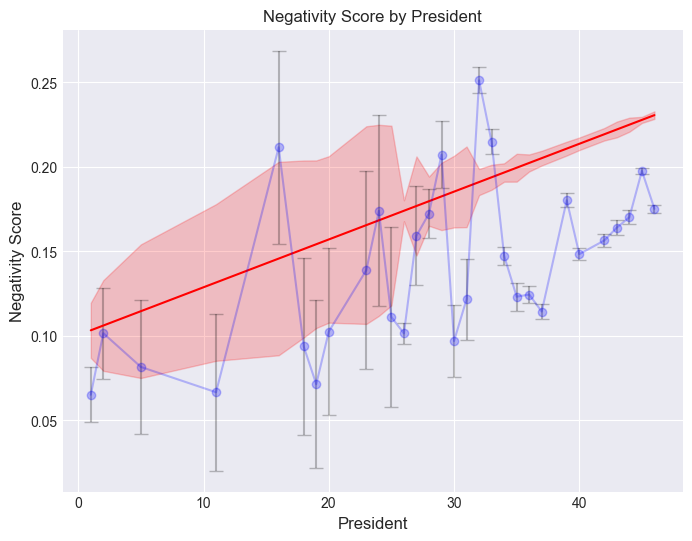

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[8, 6])

# Set a style theme (optional, you can choose any other built-in style)
plt.style.use('seaborn-darkgrid')


# Create the plot and add markers (e.g., 'o' for circles)
# Increase alpha value to make the scatterplot more opaque (0.0 to 1.0, where 1.0 is fully opaque)
plt.errorbar(x=negs['pres'], y=negs['ratio'], yerr=negs['standard_error'], fmt='o', linestyle='-', color='b', capsize=5, alpha=0.25, ecolor = 'black')

# Calculate line of best fit
coefficients = np.polyfit(range(len(negs)), negs['ratio'], 1)
polynomial = np.poly1d(coefficients)

# Generate x values for the line of best fit (presidents are evenly spaced on the x-axis)
x_fit = list(negs['pres'])
print(x_fit)
# Calculate uncertainty for the line of best fit
weights = 1 / (negs['standard_error'] ** 2)
fit_values = polynomial(x_fit)

upper_bound = fit_values + negs['standard_error']
lower_bound = fit_values - negs['standard_error']

# Plot the line of best fit
plt.plot(x_fit, polynomial(x_fit), color='r', label='Line of Best Fit')

# Fill between the uncertainty bounds
plt.fill_between(x_fit, upper_bound, lower_bound, color='r', alpha=0.2, label='Uncertainty')

# Set labels and title
plt.xlabel('President')
plt.ylabel('Negativity Score')
plt.title('Negativity Score by President')

# Adjust font sizes (optional)
plt.yticks(fontsize=10)
plt.xlabel('President', fontsize=12)
plt.ylabel('Negativity Score', fontsize=12)

# Calculate weighted R-squared value
from sklearn.metrics import r2_score
y_pred = fit_values
y_true = list(negs['ratio'])
weighted_r_squared = r2_score(y_true, y_pred, sample_weight = weights)

# Add weighted R-squared value to the plot
plt.text(0.3, 0.9, f'Weighted R-squared = {weighted_r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))


# Add a legend
plt.legend()

# Display grid lines
plt.grid()

# Optionally, save the plot to a file (e.g., 'stylish_plot.png')
# plt.savefig('stylish_plot.png')

# Show the plot
plt.tight_layout()  # To prevent label cutoff
plt.xlim([0.2,46])
plt.savefig('stylish_plot.png', dpi=300)
plt.show()



In [ ]:
x_fit

[1,
 2,
 5,
 11,
 16,
 18,
 19,
 20,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 42,
 43,
 44,
 45,
 46]